# Analysis of Toy Wright-Fisher simulations

In [1]:
# Basics
import glob, re
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Read in data

ns = ["n100", "n1000", "n10000"]

n100 = {r:
       pd.read_table(r, comment = "#")
       for r in glob.glob("more_ek/n100/*")}

n1000 = {r:
       pd.read_table(r, comment = "#")
       for r in glob.glob("more_ek/n1000/*")}

n10000 = {r:
       pd.read_table(r, comment = "#")
       for r in glob.glob("more_ek/n10000/*")}

In [24]:
def fraction_charged(seq):
    """
    For a string of amino acids
    """
    charges = 0
    for let in [aa for aa in seq.upper()]:
        if let in ['E', 'K']:
            charges += 1
            
    return(charges / len(seq))
    
    
    
def get_ek_frac_evolution(df):
    """
    Given a dataframe, return a time evolution of the frequency of charged residues (E/K) in the sequence
    as a function of simulation step.
    """
    evol = []
    for seq in df['lca']:
        evol.append(fraction_charged(seq))
    return(evol)

In [33]:
def plot_frac_charged_evolution(data_dict, n):
    """
    """
    fig = plt.figure(figsize=(6,4))
    ax = fig.add_subplot(111)
    
    for i in data_dict:
        ax.plot(get_ek_frac_evolution(data_dict[i]))
    ax.set_xlabel("Steps")
    ax.set_ylabel("Fraction E/K")
    ax.set_title("N = {}".format(n))
    plt.show()

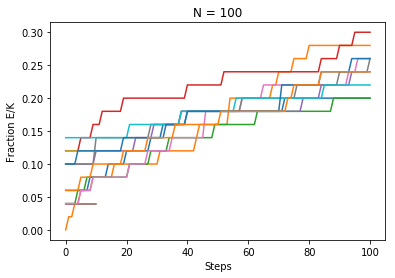

In [36]:
plot_frac_charged_evolution(n100, 100)

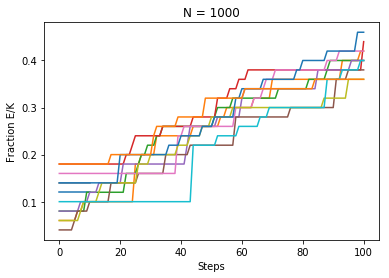

In [37]:
plot_frac_charged_evolution(n1000, 1000)

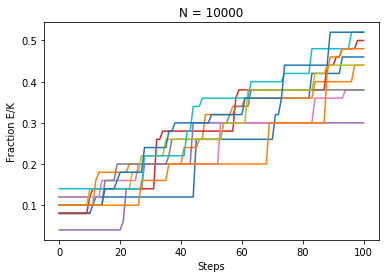

In [38]:
plot_frac_charged_evolution(n10000, 10000)

In [ ]:
# Plot delta fraction EK as a function of 